# **Линейная регрессия: численное решение**

### **ВВОДНАЯ**

✍ Ранее мы с вами установили, что аналитическое решение линейной регрессии — метод наименьших квадратов — имеет несколько недостатков. Основной из них — большая вычислительная сложность обращения матриц.

Хотелось бы получить метод, который справляется с этим недостатком. Для этого давайте вернёмся на шаг назад и вспомним, как вообще звучит постановка задачи поиска параметров модели.

В самом простом двумерном случае мы пытаемся найти такие коэффициенты  уравнения прямой w0 и w1, чтобы средний квадрат ошибки (MSE) был минимален.

![](data\f38.png)

Гауссу удалось найти общее решение для этой оптимизационной задачи и вывести формулу метода наименьших квадратов для поиска коэффициентов.

*Но можно пойти другим путём, не аналитическим (вывод формулы «в лоб»), а численным (итерационное приближение функции к минимуму).*

Самым популярным численным методом оптимизации, используемым в машинном обучении, является **алгоритм градиентного спуска**.

**Градиентный спуск (Gradient descent)** — самый используемый *алгоритм* минимизации функции потерь. Он применяется почти в каждой модели машинного обучения и является наиболее простым в реализации из всех методов численной оптимизации.
***
Начнём обзор алгоритма немного издалека.

Представим, что мы находимся на некоторой холмистой местности и нам надо добраться до самой низкой точки, но делаем мы это вслепую, то есть не знаем сам ландшафт. Назовём эту точку целью.

![](https://lms.skillfactory.ru/assets/courseware/v1/955db3eb396297eabf11b61019fb49d5/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml2-4_1.png)

Давайте опишем, как мы будем искать эту точку. Для начала необходимо задать начальную точку, из которой мы, собственно, стартуем. Далее мы двигаемся в сторону крутизны склона. Если склон круче справа, надо сделать шаг вправо, если склон круче слева, надо сделать шаг влево. Повторяем шаги до тех пор, пока не достигнем самой низкой точки.

У вас мог возникнуть вопрос: как определить, что мы достигли цели — самой низкой точки? В этой точке крутизна склона с обеих сторон равна 0 или близка к нему (ровная поверхность). Можно использовать эту информацию как точку остановки нашего алгоритма.
***
Описанный нами алгоритм можно перевести на язык математики. Он то и будет называться **алгоритмом градиентного спуска**.

Наша функция потерь, которая зависит от параметров модели, — это аналогия ландшафта местности. Пространство, в котором находится ландшафт, — это пространство параметров нашей модели. То есть это система координат, в которой по осям отложены все возможные значения параметров.

В двумерном случае, когда есть только один параметр, от которого зависит функция потерь, можно построить график функции потерь. Например, для MSE, зависящей от одного параметра, график будет иметь вид **параболы**:

![](https://lms.skillfactory.ru/assets/courseware/v1/2031eae68e1cfcfbfa6642928a844ef8/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml2-4_2.png)

Если параметров не один, а два, то функция потерь будет графически представлена в виде **поверхности в трёхмерном пространстве**. Ниже приведён пример такой поверхности и её вид сверху в виде концентрических кругов:

![](https://lms.skillfactory.ru/assets/courseware/v1/86c47a39251c3d192a314187ec8d9043/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml2-4_3.png)

В общем случае, когда у нас больше параметров модели, мы будем работать в многомерном пространстве. Но в этом нет ничего страшного. Суть поиска минимума от этого не меняется, меняется только сложность функции — **структуры ландшафта**.

Для линейной регрессии необходимо найти в этом пространстве такие координаты w0, w1, w2, ... ,wm в которых находится минимум функции потерь.

Как же нам понять, в какую сторону двигаться? Что будет отвечать за направление крутизны склона? На этот вопрос нам ответит математический анализ. В теории анализа функций, зависящих от нескольких переменных, существует понятие градиента.

***Математически градиент — это вектор, который состоит из частных производных от всех параметров функции (те которые w0,w1,w2 ... , w0).***

Он записывается следующим образом:

![](data\f39.png)

где  ***L(w)*** — функция потерь, зависящая от параметров модели, функция может быть любой (например, MSE). ***∇*** — символ набла — символьное сокращение градиента, читается как ***«градиент функции L(w)»***. 

Пусть пока что математическая формализация градиента нам непонятна, но нам важно отметить его ключевую особенность.

                    Градиент — это вектор, который показывает направление наискорейшего роста функции, а его длина — это само значение скорости функции в точке.

Если вновь обратиться к примеру с холмами, градиент показывает, с какой скоростью и в каком направлении нужно двигаться из текущей точки, чтобы достичь более высшей точки.
***
А теперь время фокусов. Если поставить перед градиентом знак минус ***—∇L(w)***, то мы получим вектор **антиградиента**, который показывает в сторону наискорейшего убывания функции потерь! А это и есть то, что нам нужно. С помощью этого знания мы сможем вычислять следующую координату в пространстве — следующую точку, которую нам нужно посетить, чтобы дойти до цели — минимума функции.

В случае одного параметра:

![](https://lms.skillfactory.ru/assets/courseware/v1/c28fb31ed69592e3b38db4d47492aeb3/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml2-4_4.png)

В случае двух параметров:

![](https://lms.skillfactory.ru/assets/courseware/v1/4a12d561ec2f0938cfd2838ffc9dce62/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml2-4_5.png)

Формально это записывается следующим образом (формулу запоминать не нужно):

![](data\f40.png)

где w — это вектор параметров модели, координаты в пространстве, а индекс в круглых скобках сверху означает номер точки в пространстве. Запись ***∇L(w^(k))*** означает, что градиент вычисляется в текущей точке под номером k.

Согласно приведённой формуле, новая координата ***w^(k+1)*** в пространстве параметров определяется как текущая координата ***w^(k)*** минус **скорость роста** в текущей точке ***∇L(w^(k))***, помноженная на **коэффициент «скольжения»**.

Отдельное внимание стоит уделить коэффициенту ***η*** (читается как «эта»). Это поправочный коэффициент, который носит название **темп обучения (learning rate)**.

**Темп обучения** — это основной параметр алгоритма. Он **определяет то, насколько сильно мы будем двигать точку**. В аналогии с нашим примером с движением по холмам можно сказать, что это коэффициент, обратный сопротивлению ландшафта, по которому мы движемся.

Управляя данным параметром (уменьшая и увеличивая его), мы управляем скоростью движения к точке минимума. Чем больше темп обучения, тем длиннее наши шаги и тем быстрее мы движемся, и наоборот. О том, зачем этот параметр нужен и как выбирать значение ***η***, мы поговорим чуть позже.
***
**Примечание. Темп обучения является примером внешнего параметра алгоритма, которым может управлять пользователь. Такие параметры ещё называют гиперпараметрами.**
***

Есть ещё одно важное свойство градиента: теоретически в точке минимума длина вектора равна 0, то есть движения не происходит. Это свойство мы можем использовать в качестве критерия остановки нашего алгоритма.

![](https://lms.skillfactory.ru/assets/courseware/v1/c06a98caf800ce3fb0f82a6a26235f05/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml2-4_6.png)

Теперь у нас есть все компоненты, чтобы составить алгоритм для обучения модели линейной регрессии методом градиентного спуска. Для простоты возьмём случай, когда мы строим регрессию на основе только одного признака.

Для начала вспомним, как выглядит вид модели линейной регрессии, когда у нас есть только один фактор:

![](data\f43.png)

У нас есть набор значений фактора x = (x1, x2, x3, ... , xn) и столбец с правильными ответами y = (y1, y2, y3, ... , yn). Мы пытаемся найти такие коэффициенты прямой, чтобы ошибка предсказания была минимальной. 

Алгоритм градиентного спуска для такой модели будет выглядеть следующим образом: 

### **Алгоритм градиентного спуска**

1. **Проинициализировать значения параметров w0, w1.** 

На аналогии наших холмов это будет означать выбор начальной точки в пространстве, из которой мы будем двигаться.  
Правильная инициализация параметров — это отдельная история. Например, можно инициализировать все параметры нулями или случайными значениями.  

2. **Повторять до тех пор, пока длина градиента не приблизится к 0.**

На практике полного равенства градиента нулю достичь невозможно из-за численных вычислений, поэтому в качестве остановки задают минимальную границу, ниже которой длина градиента считается достаточной, чтобы остановиться (например, 0.1, 0.01 или 0.001). Если длина будет меньше заданной, то алгоритм можно останавливать.  
Существуют и другие критерии остановки: например, остановиться, если текущее значение функции потерь < 1.5. Но они используются гораздо реже.  

3. **Вычислить градиент функции потерь ∇L(w)**

Это будет означать нахождение направления и вектора скорости роста нашего ландшафта. 

Грубо говоря, нужно взять вектор-столбец с примерами ***xi*** и подставить его в формулу для вычисления градиента функции потерь. Формулы вычисления градиента для наиболее часто используемых функций потерь уже вычислены и заложены в библиотечные реализации.

Далее приведены формулы вычисления градиента для MSE для двух параметров.

![](data\f44.png)

4. **Обновить параметры модели, сдвинув их в сторону антиградиента.**

Из текущей точки необходимо перейти в новую точку, в сторону убывания высоты ландшафта.

Для обновления координат точки используем формулу:

![](data\f45.png)

Далее приведены формулы вычисления градиента для MSE для двух параметров.

![](data\f46.png)

Индекс в круглых скобках сверху означает номер итерации.

***
Анимация работы градиентного спуска для двух параметров:

![](https://lms.skillfactory.ru/assets/courseware/v1/4e5a14da749976ec2770eaded04098d4/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml2-4_7.gif)

А как будет меняться само уравнение прямой при минимизации функции ошибок? Коэффициенты прямой будут адаптироваться под зависимость в данных и приближаться к оптимальным значениям. В анимации это будет выглядеть следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/8c7ab69cf4bbdff33c8c2844be1ec0bf/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml2-4_8.gif)
***
**Давайте подведём промежуточный итог.**

**Градиентный спуск — простой и мощный алгоритм оптимизации, который позволяет итеративно находить минимум функции потерь и тем самым находить оптимальные параметры модели.**  
**Причём функция потерь не обязательно должна быть MSE. Главное требование к функции потерь — это её гладкость во всех точках.**
***

**Примечание. С математической точки зрения ***гладкими*** называются функции, которые имеют производную во всех точках.**  
Для нашего пока что обывательского понимания это значит, что функция должна иметь плавный переход из точки в точку. Примеры:

![](https://lms.skillfactory.ru/assets/courseware/v1/9df85ced8c7494fe39787b61a74459b3/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml2-4_9.png)

Благодаря своей простоте алгоритм обладает минимальной вычислительной сложностью и работает быстрее, чем метод наименьших квадратов, даже на огромных наборах данных с тысячами признаков.

***

Однако у градиентного спуска есть одна большая **проблема — это сходимость** алгоритма к точке истинного минимума. Алгоритм может попросту не сойтись к истинному минимуму.

Сходимость зависит от многих факторов, главные из которых:

* сложности зависимости и сложности функции потерь;
* выбранный темп обучения;
* выбранная начальная точка (инициализация параметров);
* масштабирование признаков.

Из-за сложной зависимости и сложности самой функции потерь она может иметь несколько видов минимумов: **локальные** и **глобальные**.

**Локальный минимум** — это минимум на какой-то локальной области. 

**Глобальный минимум** — это минимум на всей области определения функции (на всём ландшафте).

Например, ваши минимальные расходы в онлайн-банке за весь период пользования приложением — это глобальный минимум. А минимальные расходы в приложении за последние шесть месяцев — это локальный минимум. Эти значения могут существенно отличаться.

Когда мы говорим о функции потерь, нас интересует именно глобальный минимум, то есть тот минимум, которого вообще возможно достичь при управлении параметрами.

Функция потерь с локальным и глобальным минимумом в случае одного параметра:

![](https://lms.skillfactory.ru/assets/courseware/v1/63595c20c0e55a9c4b38854d17a9f37c/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml2-4_10.png)

Функция потерь с локальным и глобальным минимумом в случае двух параметров:

![](https://lms.skillfactory.ru/assets/courseware/v1/416726975e8665ec14562e0c12d73294/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml2-4_11.png)
***
Проблема градиентного спуска заключается в том, что **алгоритм может «застрять» в локальном минимуме и не выйти из него**.

Застряв в локальном минимуме, мы не найдем настоящие оптимальные значения параметров.

Чтобы частично решить эту проблему используется не классический градиентный спуск, а его [**модификации**](https://habr.com/ru/post/413853/). Существует множество модификаций градиентного спуска, и мы будем знакомиться с большей их частью далее в курсе.

В этом модуле мы будем использовать **стохастический градиентный спуск (Stochastic Gradient Descent, SGD)**. 

Стохастическая модификация предполагает, что один шаг градиентного спуска производится на основе градиента, рассчитанного не по всей выборке, а только по случайно выбранной части.

То есть мы случайно выбираем несколько строк из таблицы и подставляем их в алгоритм, делаем шаг в сторону минимума и повторяем это множество раз, пока алгоритм не сойдётся к приемлемому значению или пока не закончатся итерации (в реализации всегда задаётся максимум итераций на случай, если алгоритм не сойдётся и будет «блуждать по холмам» вечно).

Благодаря этому вектор градиента всё время колеблется, и мы прыгаем из точки в точку, а не идём вдоль ровной линии, как это было в классическом градиентом спуске.

На рисунке ниже приведены графики «блуждания» точки в пространстве функции потерь (вид сверху).

![](https://lms.skillfactory.ru/assets/courseware/v1/62f07879b1a6d4d1140675a84bce3566/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml2-4_12.png)

Благодаря таким случайным колебаниям у нас появляется больше возможностей «выкарабкаться» из локальных минимумов и дойти до глобального минимума.

*Однако из-за таких скачков есть шанс пропустить и глобальный минимум функции потерь, если скачки будут слишком большими.*

Даже для обычной выпуклой функции, такой как парабола, градиентный спуск может сходиться медленно, если выбран слишком маленький темп обучения, или не сходиться вообще, если темп слишком большой. Поэтому ***темп обучения — это один из самых важных внешних параметров, на который мы можем повлиять.***

![](https://lms.skillfactory.ru/assets/courseware/v1/71750df0fdd1e154d7eab05413a92d0f/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml2-4_13.png)
***
Но есть идея получше! Будем брать большой шаг в начале обучения и уменьшать его постепенно, приближаясь к минимуму, чтобы не «выпрыгнуть» из точки минимума.

В реализации стохастического градиентного спуска в sklearn, с которым мы будем работать, именно такая идея и используется по умолчанию. Параметр  регулируется в процессе обучения — он уменьшается с ростом числа итераций по формуле:

![](data\f48.png)

где ***η*** — начальное значение темпа обучения, ***p*** — мощность уменьшения темпа (задаётся пользователем).
***
Ещё один важный момент, на который стоит обратить внимание при работе с градиентным спуском — это обязательное масштабирование факторов (приведение факторов к единому масштабу или к единым статистическим характеристикам), если их несколько.

Например, в нашем наборе данных о домах в Бостоне есть признак NOX (концентрация оксидов азота): он изменяется в диапазоне от 0 до 1. Также есть признак LSTAT (процент низкостатусного населения), который изменяется в диапазоне от 0 до 100 %. 

Для градиентного спуска (особенно стохастического) важно, чтобы все факторы были приведены к единому масштабу с помощью нормализации/стандартизации (мы изучали их в модуле EDA-3. «Проектирование признаков»). Иначе в пространстве параметров функция ошибки становится очень растянутой по одной оси, но очень сжатой по другой, и найти её минимум будет очень сложно.

## **ЧИСЛЕННОЕ РЕШЕНИЕ НА PYTHON**

Как и раньше, будем работать с датасетом о домах в Бостоне из библиотеки sklearn.

In [12]:
from sklearn import metrics

from sklearn import linear_model
from sklearn import preprocessing
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
from IPython.display import display
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
%matplotlib inline
plt.style.use('seaborn') #установка стиля matplotlib

In [3]:
from sklearn.datasets import load_boston 
boston = load_boston()
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

c:\Users\local_admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inclu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Обучим с помощью градиентного спуска линейную регрессию на одном факторе — LSTAT
# (процент низкостатусного населения) — и сравним результат с полученным ранее результатом МНК.
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов

SGDRegressor

Будем использовать реализацию стохастического градиентного спуска для линейной регрессии из библиотеки sklearn — [**SGDRegressor**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html). Она находится в том же модуле **linear_model**.

У класса SGDRegressor есть множество параметров. Например, параметр **random_state** отвечает за число, на основе которого происходит генерация  случайных чисел. Напомним, в **SGD** случайность присутствует в инициализации параметров и выборе части из набора данных. Установив значение параметра **random_state** равным определённому числу, мы можем гарантировать одинаковые результаты работы метода при разных запусках. Пусть это будет число 42.

Для обучения используется метод **fit()**: он запускает работу градиентного спуска для поиска параметров, в него необходимо передать данные и правильные ответы.

Примечание. К сожалению, в sklearn нельзя посмотреть то, как происходит поиск оптимальных параметров с помощью SGD. Поэтому нет возможности продемонстрировать историю изменения функции потерь. В модулях по оптимизации мы самостоятельно реализуем алгоритм и посмотрим на поэтапную минимизацию.
***
Обучение завершено, параметры найдены. Давайте выведем их на экран. Для выведения получившихся параметров на экран используются уже знакомые вам атрибуты **coef_** и **intercept_**:

In [6]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_lstat.fit(X, y)

print('w0: {}'.format(sgd_lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(sgd_lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: [34.33010969]
w1: [-0.96193242]


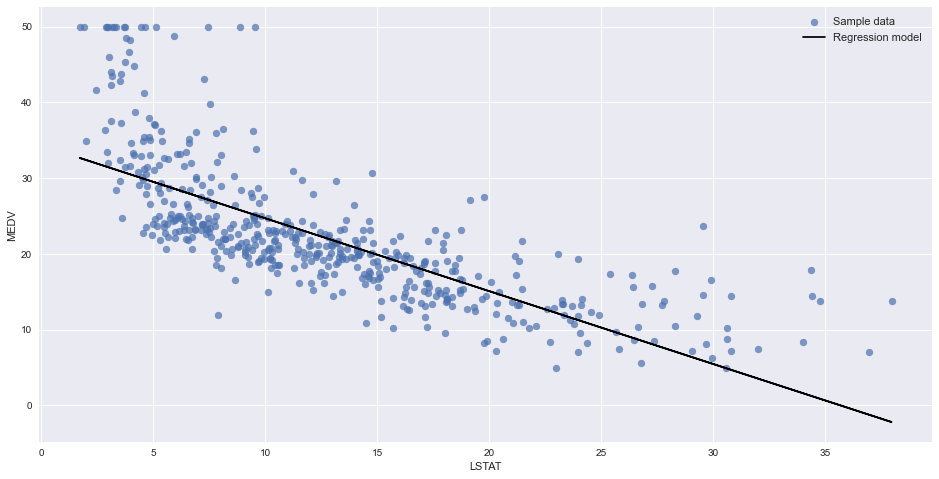

In [8]:
# Давайте с помощью метода predict() сделаем предсказание цены для всех объектов из нашей выборки и построим визуализацию:

#функция для визуализации регрессии
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(16, 8)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

In [9]:
# Можно рассчитать метрики регрессии для полученной модели. Давайте для примера посчитаем R^2:

print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.542


In [10]:
# Теперь попробуем обучить многомерную линейную регрессию с помощью SGD.
# Как и раньше составим полную матрицу наблюдений  из всех факторов,
# которые нам даны. Обучим модель и выведем значения коэффициентов в виде DataFrame:

#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
 
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_full.fit(X, y)
 
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,1.540729e+11
1,ZN,-5.382789e+08
2,INDUS,3.091632e+11
3,CHAS,1.485638e+10
4,NOX,2.393660e+10
5,RM,1.134434e+10
6,AGE,9.343666e+10
7,DIS,-1.241329e+11
8,RAD,2.584134e+11
9,TAX,-3.359744e+11


Все коэффициенты имеют запредельные значения (9-11 степени числа 10). Это типичная картина расходящегося градиентного спуска: алгоритм не достиг точки минимума по каким-то причинам. Такие высокие значения коэффициентов означают, что модель является неустойчивой.

Давайте сделаем предсказание и выведем R^2 для обученной модели:

In [11]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -155407065857466568600977408.000


R^2 отрицательный. Да ещё какой! Напомним, отрицательный R^2 говорит о том, что модель абсолютно не описывает зависимости в данных.

В чём же причина? Неужели SGD не справился с поиском 14 параметров (свободный член + 13 коэффициентов при факторах)?

Ответ очень простой — **отсутствие масштабирования.** Как мы уже говорили ранее, при использовании градиентного спуска и его модификаций очень важно масштабировать данные с помощью нормализации или стандартизации. Иначе алгоритм теряется в таком растянутом пространстве из-за неравномерных градиентов.

Давайте стандартизируем наши данные. Воспользуемся классом **StandardScaler** из модуля **preprocessing** библиотеки **sklearn**, который реализует стандартизацию.

In [14]:
#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Производим стандартизацию
X_scaled = scaler.fit_transform(X)
#Составляем DataFrame из результата
X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

# Попытка №2. Обучим модель и составим таблицу из её параметров:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_full.fit(X_scaled, y)
 
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_full.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

,Features,Coefficients
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


R2 score: 0.740


**Важно! Если вы обучили модель на стандартизованных данных, то и для предсказания необходимо передавать их в стандартизованном виде.**

Например, если попытаться сделать предсказание с помощью построенной модели, передав в качестве матрицы наблюдений нестандартизованную таблицу, то ошибки мы не получим, однако значение метрики будет неадекватным:

In [15]:
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -1856.503


У класса **SGDRegressor**, помимо **random_state**, есть ещё множество различных внешних параметров, которые можно настраивать. Со всем списком вы можете ознакомиться в [**документации**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html). А мы приведём несколько самых важных:

* **loss** — функция потерь. По умолчанию используется squared_loss — уже привычная нам MSE. Но могут использоваться и несколько других. Например, значение "huber" определяет функцию потерь Хьюбера. Эта функция менее чувствительна к наличию выбросов, чем MSE.
* **max_iter** — максимальное количество итераций, выделенное на сходимость. Значение по умолчанию — 1000.
* **learning_rate** — режим управления темпом обучения. Значение по умолчанию — 'invscaling'. Этот режим уменьшает темп обучения по формуле, которую мы рассматривали ранее:
![](data\f48.png) Есть ещё несколько режимов управления, о которых вы можете прочитать в документации. Если вы не хотите, чтобы темп обучения менялся на протяжении всего обучения, то можете выставить значение параметра на "*constant*".

* **eta0** — начальное значение темпа обучения ***η0***. Значение по умолчанию — 0.01.
Если параметр *learning_rate="constant"*, то значение этого параметра будет темпом обучения на протяжении всех итераций.

* **power_t** — значение мощности уменьшения ***p*** в той же формуле (которая выше). Значение по умолчанию — 0.25.

Давайте посмотрим, что будет, если выставить константный режим управления темпом обучения и задать ему более высокое значение, например 0.1:

In [16]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=0.1, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))


R2 score: -335415038359.635


SGD разошёлся из-за слишком высокого темпа обучения. 

Вот ещё один плохой пример. Что будет, если поставить слишком маленькое значение параметра eta0? Например, 0.000001.

In [17]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad2 = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=1e-6, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad2.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad2.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -1.578


c:\Users\local_admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGD не дошёл до точки минимума из-за слишком низкого темпа обучения (мы видим предупреждение (warning), которое говорит о том, что алгоритму не хватило количества итераций (max_iter), чтобы добраться до минимума).

***
Так как модель линейной регрессии является довольно простой и исследованной, то значения параметров, которые обладают наибольшей эффективностью, уже установлены по умолчанию (аргументы по умолчанию), но бывают ситуации, когда поэкспериментировать с параметрами может быть полезно, чтобы попытаться повысить качество.

In [18]:
# Обучите SGDRegressor на датасете о домах в Бостоне с параметром
# остановки, равным 0.1, и random_state = 42. Остальные параметры оставьте по умолчанию.
# Рассчитайте коэффициент детерминации R^2. Ответ округлите до
# третьего знака после точки-разделителя. Сделайте вывод по полученным результатам.

sgd_lr_bad2 = linear_model.SGDRegressor(
    random_state=42,
    tol=0.1 #конечное значение остановки обучения
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad2.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad2.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.735


## **СРАВНЕНИЕ АНАЛИТИЧЕСКОГО И ЧИСЛЕННОГО РЕШЕНИЙ**

У вас наверняка возник вопрос: что лучше использовать — **LinearRegression** (аналитическое решение через метод наименьших квадратов) или **SGDRegressor** (численное решение через стохастический градиентный спуск)?

Приведём сравнение двух реализаций в виде таблицы:

[функции потерь, доступные в sklearn](https://scikit-learn.ru/1-5-stochastic-gradient-descent/#mathematical-formulation)

![](data\table2.png)

По приведённой таблице можно выделить примерные области применения каждого из методов:

* Если стоит задача **одноразового** обучения на всех данных, которые есть, и **признаков немного (меньше 1 000**), наш выбор — **LinearRegression**, так как МНК обеспечивает простое решение и гарантированную сходимость.
* Если стоит задача **непрерывного** обучения модели в процессе её эксплуатации или **количество признаков очень велико**, наш выбор — **SGDRegressor** с возможностью корректировки параметров на новых данных.